## Cancer Survival Prediction


### Dataset 
The dataset consists of pathological and clinical annotations for more than 10,000 patients with advanced cancer. It is available on https://www.cbioportal.org/

It consists of 10,945 records and 26 features with 10,336 unique patients with 2 target columns. The first target column is Overall Survival (Months) which is a numeric column and the second one is Overall Survival Status which is categorical column consist of 2 unique categories.

### Project Objectives
#### Descriptive Analysis:
-  The average survival months of all cancer types.
-  The average survival months of each cancer type.
-  The survival rate for survived patients. 
-  The corellation between the clinical features and survival status.
-  The corellation between the clinical features themselves.

#### Predeiction:
-  Predict the survival status for a patient with cancer based on the clinical features.
-  Predict the overall survival months for patient with cancer based on the clinical features.

### Tools 
The libraries planned to be used for this project are:  
-  Data manipulation: Pandas and numpy.
-  Visualization: Seaborn and Plotly.
-  Prediction: Sklearn regression and classification libraries.




## Code

In [ ]:
## install plotly library if it's not installed before
## ! conda install plotly ?y

In [1]:
## import the libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [4]:
df = pd.read_csv('msk_impact_2017_clinical_data.tsv', sep = '\t' )

In [5]:
## dataset shape
df.shape

(10945, 26)

In [6]:
## first 2 top rows from the dataframe
df.head()

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,Tumor Purity,Patient's Vital Status
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16,...,1,428,Primary,Female,Unknown,Matched,FFPE,Biopsy,50.0,ALIVE
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7,...,1,281,Metastasis,Female,Never,Matched,FFPE,Biopsy,40.0,DECEASED
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5,...,1,454,Primary,Male,Never,Matched,FFPE,Biopsy,30.0,DECEASED
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6,...,1,1016,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Resection,40.0,ALIVE
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1,...,2,1161,Primary,Female,Never,Matched,FFPE,Resection,NaN,ALIVE


In [7]:
## columns data types summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       10945 non-null  object 
 1   Patient ID                     10945 non-null  object 
 2   Sample ID                      10945 non-null  object 
 3   Cancer Type                    10945 non-null  object 
 4   Cancer Type Detailed           10945 non-null  object 
 5   DNA Input                      10945 non-null  float64
 6   Fraction Genome Altered        10939 non-null  float64
 7   Matched Status                 10945 non-null  object 
 8   Metastatic Site                4779 non-null   object 
 9   Mutation Count                 10945 non-null  int64  
 10  Oncotree Code                  10945 non-null  object 
 11  Overall Survival (Months)      8142 non-null   float64
 12  Overall Survival Status        10943 non-null 

In [8]:
## statistical discription of the numeric columns
df.describe()

,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Number of Samples Per Patient,Sample coverage,Tumor Purity
count,10945.000000,10939.000000,10945.000000,8142.000000,10945.000000,10945.000000,10475.000000
mean,238.598098,0.194683,7.126176,12.456394,1.120786,717.547190,45.610597
std,36.335811,0.189345,16.809472,7.765755,0.371490,267.344696,22.283762
min,50.000000,0.000000,0.000000,0.000000,1.000000,48.000000,10.000000
25%,250.000000,0.035500,2.000000,6.540000,1.000000,538.000000,30.000000
50%,250.000000,0.144900,4.000000,11.140000,1.000000,726.000000,40.000000
75%,250.000000,0.296200,7.000000,17.350000,1.000000,895.000000,60.000000
max,250.000000,1.000000,455.000000,40.400000,5.000000,2778.000000,100.000000


In [9]:
## check null values in each column
df.isna().sum()

Study ID                            0
Patient ID                          0
Sample ID                           0
Cancer Type                         0
Cancer Type Detailed                0
DNA Input                           0
Fraction Genome Altered             6
Matched Status                      0
Metastatic Site                  6166
Mutation Count                      0
Oncotree Code                       0
Overall Survival (Months)        2803
Overall Survival Status             2
Primary Tumor Site                 28
Sample Class                        0
Sample Collection Source            0
Number of Samples Per Patient       0
Sample coverage                     0
Sample Type                         0
Sex                                 0
Smoking History                     2
Somatic Status                      0
Specimen Preservation Type          0
Specimen Type                       1
Tumor Purity                      470
Patient's Vital Status              2
dtype: int64

In [10]:
## get the number of the unique patients
len(df['Patient ID'].unique())

10336

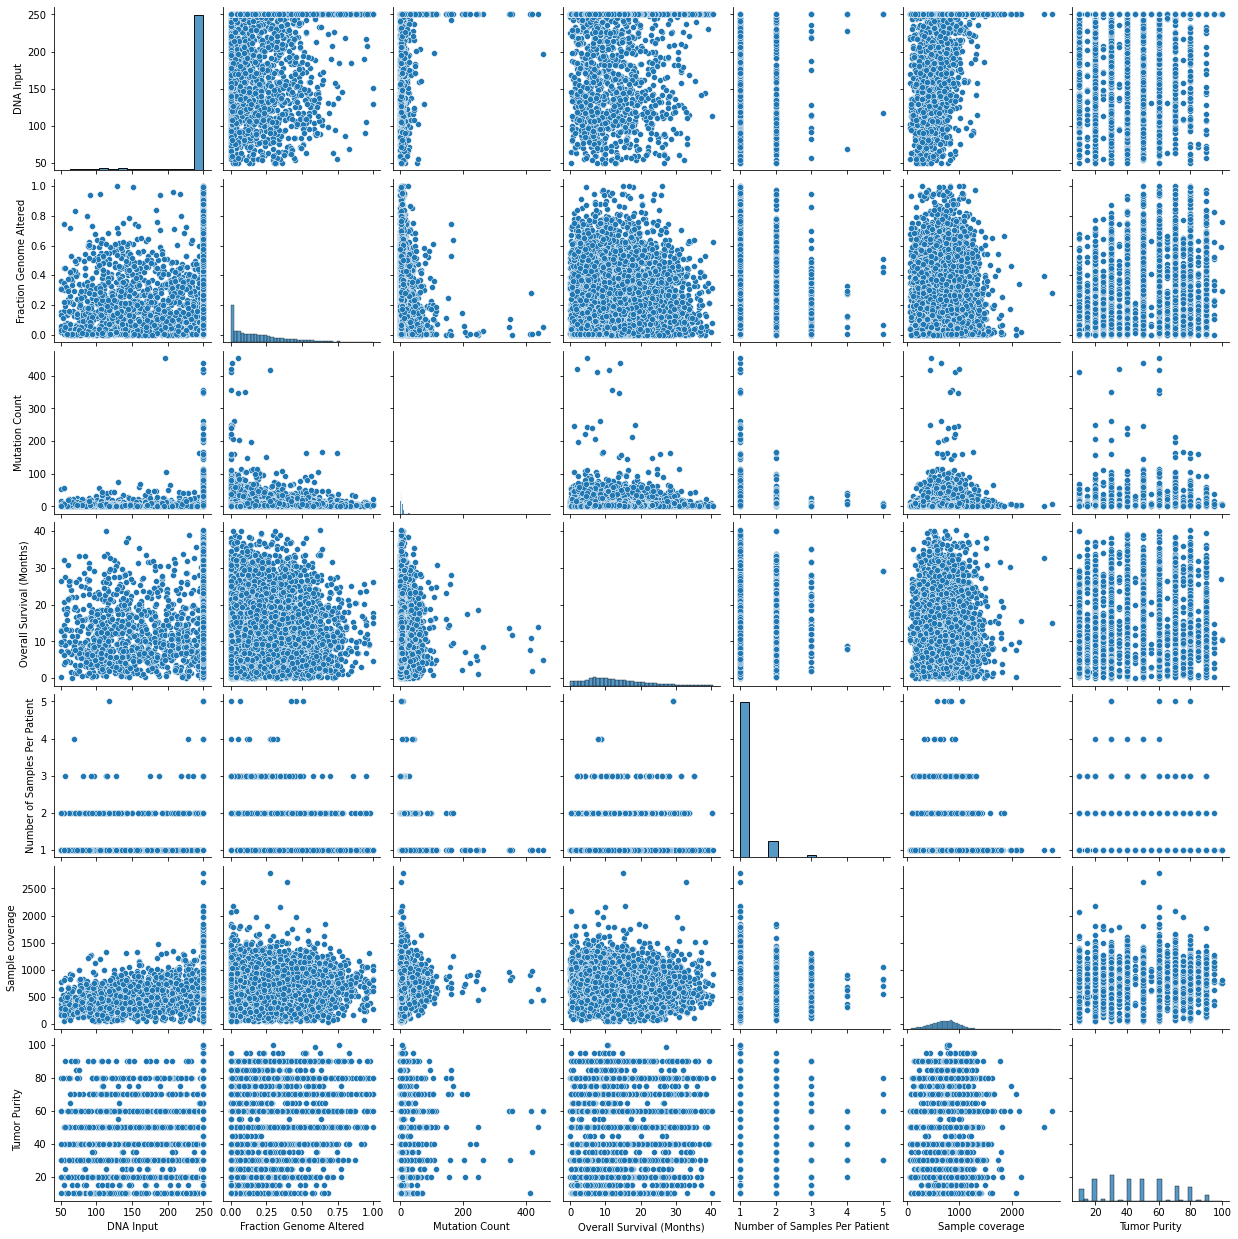

In [11]:
## numeric features distribution and correlation between numeric features
sns.pairplot(df)

In [12]:
## unique values of Patients Vital Status
df['Patient\'s Vital Status'].unique()

array(['ALIVE', 'DECEASED', nan], dtype=object)

In [13]:
## total number of alive patients
df[df['Patient\'s Vital Status'] == 'ALIVE'].shape[0]

7830

In [14]:
## total number of deceased patients
df[df['Patient\'s Vital Status'] == 'DECEASED'].shape[0]

3113

In [15]:
## get the categorical features
cat_df = df.select_dtypes(include = 'object')

In [16]:
## get the numerical features
num_df = df.select_dtypes(include = np.number)

<AxesSubplot:>

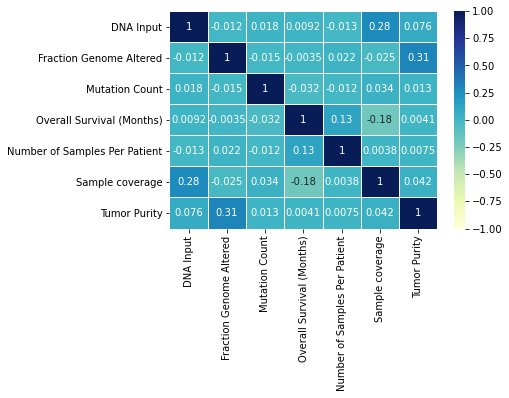

In [17]:
## plot a correlation heatmap of the numerical features 
sns.heatmap(num_df.corr(), vmin=-1,vmax=1, annot = True, linewidths=.5, cmap = "YlGnBu")

In [18]:
# create a pie chart to visualize the percentage of survival status 
trace = go.Pie(labels = ['ALIVE','DECEASED'], values = df['Patient\'s Vital Status'].value_counts(),
               textfont=dict(size=15), opacity = 0.8, marker=dict(colors=['lightskyblue', 'gold'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title ='Survival Status Percentage') # plot title
fig = dict(data = [trace], layout=layout)
py.iplot(fig)